In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import *

In [34]:
a, a_err = (3.1304347826086867e-06, 3.1304347826086867e-06) # meter per pulse

In [35]:
def bigaussian(p, x):
    return gaussian(p[:3], x) + gaussian(p[3:], x)

## Center

In [49]:
data = pd.read_csv('./data/one_closer1.csv')
data['x'] *= a


Converged with chi-squared 14541.73
Number of degrees of freedom, dof = 84.00
Reduced chi-squared 173.12

Parameter # | Initial guess values:    | Best fit values:         | Uncertainties in the best fit values:
0           | 1.000e+01                | 2.271e+00                | 1.497e-02               
1           | 1.500e-01                | 1.576e-01                | 4.734e-05               
2           | 2.000e-02                | 7.999e-03                | 5.176e-05               
3           | 1.000e+01                | 4.305e+00                | 4.132e-02               
4           | 1.000e-01                | 1.171e-01                | 8.496e-04               
5           | 1.000e+00                | 7.471e-02                | 8.849e-04               
0.018835915624440338 0.00012187430782578249

Converged with chi-squared 4438.51
Number of degrees of freedom, dof = 84.00
Reduced chi-squared 52.84

Parameter # | Initial guess values:    | Best fit values:         | Uncertaintie

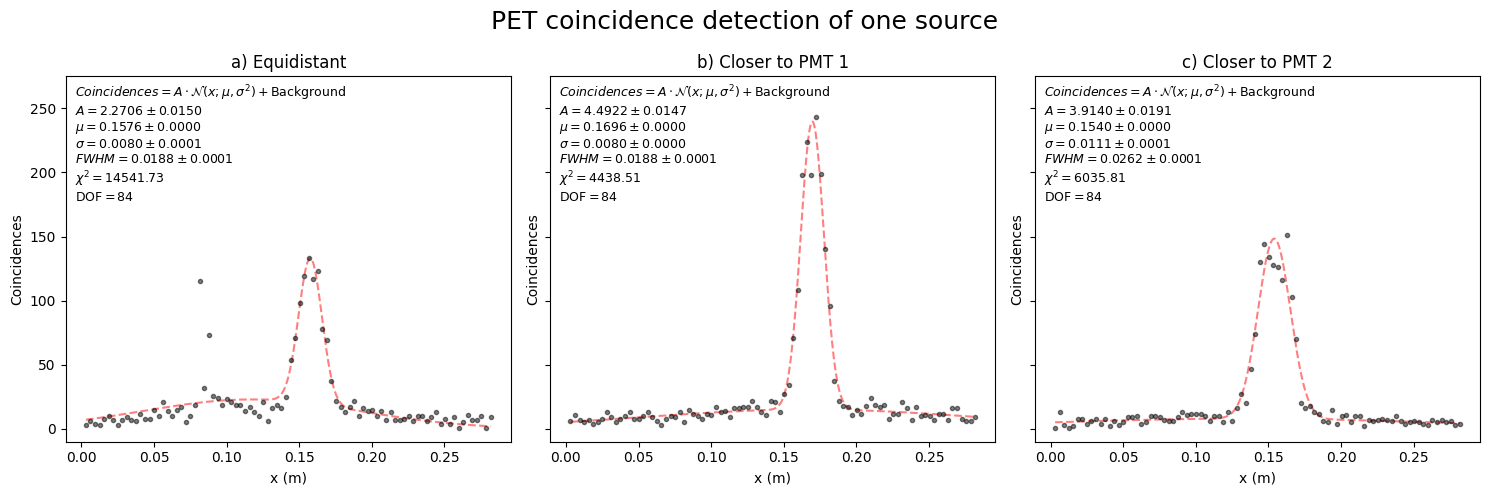

In [75]:
fnames = ['./data/one_center.csv', './data/one_closer1.csv', './data/one_closer2.csv']
titles = ['a) Equidistant', 'b) Closer to PMT 1', 'c) Closer to PMT 2']
fig, axs = plt.subplots(1, len(fnames), figsize=(len(fnames) * 5, 5), sharex=True, sharey=True)

for fname, title, ax in zip(fnames, titles, axs):
    
    data = pd.read_csv(fname)
    data['x'] *= a

    params_i = [10, 0.15, 0.02, 10, 0.1, 1]
    params, params_err, chisq, dof = data_fit(
        params_i, bigaussian, 
        data['x'], data['coincidences'], np.ones_like(data['coincidences'])
    )

    linspace = np.linspace(data['x'].min(), data['x'].max(), num=1000)
    curve = bigaussian(params, linspace)

    fwhm = 2 * np.sqrt(2 * np.log(2)) * params[2]
    fwhm_err = 2 * np.sqrt(2 * np.log(2)) * params_err[2]
    print(fwhm, fwhm_err)

    ax.errorbar(
        data['x'], 
        data['coincidences'], 
        fmt='k.', alpha=0.5,
    )

    ax.plot(linspace, curve, color='r', linestyle='dashed', alpha=0.5)

    ax.set_ylim(-10, 275)
    ax.set_xlabel('x (m)')
    ax.set_ylabel('Coincidences')
    ax.set_title(title)

    txt = '$Coincidences = A \cdot \mathcal{N}(x; \mu, \sigma^2) + $Background \n'
    txt += '$A = {:.4f} \\pm {:.4f}$ \n'.format(params[0], params_err[0])
    txt += '$\\mu = {:.4f} \\pm {:.4f}$ \n'.format(params[1], params_err[1])
    txt += '$\\sigma = {:.4f} \\pm {:.4f}$ \n'.format(params[2], params_err[2])
    txt += '$FWHM = {:.4f} \\pm {:.4f}$ \n'.format(fwhm, fwhm_err)
    txt += '$\\chi^2 = {:.2f}$ \n'.format(chisq)
    txt += 'DOF$ = {}$'.format(dof)
    ax.text(0.02, 0.98, txt, transform=ax.transAxes , fontsize=9, verticalalignment='top')
    
fig.suptitle('PET coincidence detection of one source', fontsize=18)
plt.tight_layout()

In [76]:
fig.savefig('./figures/one_source.pdf')